In [143]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt


In [135]:
def simple_exp_smooth(d, extra_periods = 1, a = 0.4):

    col_len = len(d)   
    #append np.nan for number of extra periods you want to forecast
    [d.append(np.nan) for i in range(extra_periods)]

    #fill forecast column with nan values
    f = []
    [f.append(np.nan) for i in range(col_len+extra_periods)]

    #inititate forecast column
    f[0] = d[0]

    #forecast historical data
    for i in range(1,col_len+1):
        f[i] = (a*d[i-1] + (1-a)*f[i-1])

    #forecast into the future
    for i in range(extra_periods-1):
        f[i+col_len+1] = ((1-a)*f[i+col_len])


    #map to dataframe
    df = pd.DataFrame.from_dict({"Demand":d, "Forecast":f})
    df['Error'] = df['Forecast'] - df['Demand']
    
    return df


In [144]:
def kpi(df):
    #average demand
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    #absolute bias
    bias_abs = df['Error'].mean()
    #relative bias
    bias_rel = bias_abs / dem_ave
    #print results 
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))

    #calculate MAPE
    MAPE = (df['Error'].abs() / df['Demand']).mean()
    #print results
    print('MAPE: {:0.2%}'.format(MAPE))

    #calculate absoltue and scaled MAE
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    #print results
    print('MAE: {:0.2f}, {:0.2%}'.format(MAE_abs,MAE_rel))

    #calculate absolute and scaled RSME
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel =  RMSE_abs / dem_ave
    #print results
    print('RMSE: {:0.2f}, {:0.2%}'.format(RMSE_abs,RMSE_rel))

In [145]:
d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
table = simple_exp_smooth(d, extra_periods=4, a=0.4)
table

,Demand,Forecast,Error
0,28.0,28.000000,0.000000
1,19.0,28.000000,9.000000
2,18.0,24.400000,6.400000
3,13.0,21.840000,8.840000
4,19.0,18.304000,-0.696000
5,16.0,18.582400,2.582400
6,19.0,17.549440,-1.450560
7,18.0,18.129664,0.129664
8,13.0,18.077798,5.077798
9,16.0,16.046679,0.046679


In [146]:
kpi(table)

Bias: 1.92, 12.40%
MAPE: 18.33%
MAE: 2.61, 16.81%
RMSE: 3.80, 24.45%


<AxesSubplot:>

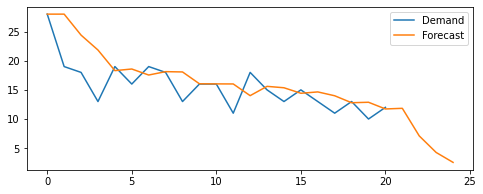

In [148]:
table[['Demand','Forecast']].plot(figsize=(8,3))